## 4-1 Regression

**Increasing Data**

In [68]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

num_points = 1000
x_values = np.linspace(0, 4 * np.pi, num_points)
y_values = np.sin(x_values)

train_size = 0.10
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, train_size=train_size, random_state=1)

MSE : 42.63% R2 : 14.75%


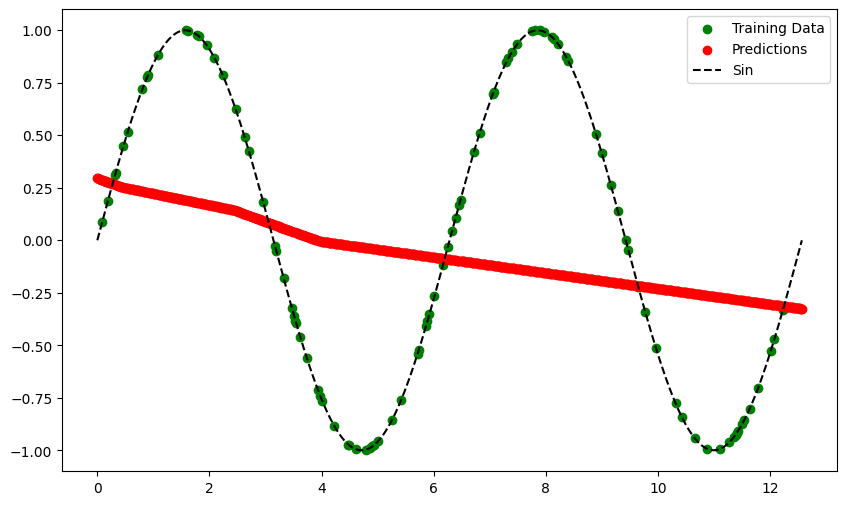

In [69]:
n_layers = 2
nn_model = MLPRegressor(hidden_layer_sizes=(10,) * n_layers, activation='relu', max_iter=10000, random_state=1)
nn_model.fit(x_train.reshape(-1, 1), y_train)

y_pred = nn_model.predict(x_test.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse * 100:.2f}%", f"R2 : {r2 * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(x_train.reshape(-1, 1), y_train, color='green', label='Training Data')
plt.scatter(x_test.reshape(-1, 1), y_pred, label='Predictions', color='red')
plt.plot(x_values, y_values, linestyle='dashed', label='Sin', color='black')
plt.legend()
plt.show()

In [70]:
increment = 0.10
train_size = 0.10

plot_paths = []
models = []

while train_size <= 0.90:
    x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, train_size=train_size, random_state=1)

    nn_model = MLPRegressor(hidden_layer_sizes=(10,) * n_layers, activation='relu', max_iter=10000, random_state=1)
    nn_model.fit(x_train.reshape(-1, 1), y_train)

    models.append(nn_model)

    y_pred = nn_model.predict(x_test.reshape(-1, 1))

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE : {mse * 100:.2f}%", f"R2 : {r2 * 100:.2f}%")


    plt.figure(figsize=(10, 6))
    plt.scatter(x_train.reshape(-1, 1), y_train, color='green', label='Training Data')
    plt.scatter(x_test.reshape(-1, 1), y_pred, label='Predictions', color='red')
    plt.plot(x_values, y_values, linestyle='dashed', label='Sin', color='black')
    plt.legend()

    plot_file_path = f'/sin_increasedata_{int(train_size*100)}.png'
    plt.savefig(plot_file_path)
    plt.close()

    plot_paths.append(plot_file_path)
    train_size += increment


MSE : 42.63% R2 : 14.75%
MSE : 42.47% R2 : 15.36%
MSE : 38.87% R2 : 22.84%
MSE : 38.06% R2 : 22.14%
MSE : 35.19% R2 : 27.72%
MSE : 8.73% R2 : 82.36%
MSE : 8.75% R2 : 82.26%
MSE : 33.92% R2 : 25.06%
MSE : 35.65% R2 : 23.78%


In [71]:
import imageio.v2 as imageio

gif_path = '/4_1_increase_data.gif'
with imageio.get_writer(gif_path, duration=1.5, loop=0, fps=2) as writer:
    for filename in plot_paths:
        image = imageio.imread(filename)
        writer.append_data(image)

gif_path

'/4_1_increase_data.gif'

**Increasing Layers**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, train_size=0.9, random_state=1)

plot_paths = []

for n_layers in range(1, 21):
    hidden_layer_sizes = (10,) * n_layers
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', max_iter=10000, random_state=1)
    nn_model.fit(x_train.reshape(-1, 1), y_train)

    y_pred = nn_model.predict(x_test.reshape(-1, 1))

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE : {mse * 100:.2f}%", f"R2 : {r2 * 100:.2f}%")


    plt.figure(figsize=(10, 6))
    plt.scatter(x_train.reshape(-1, 1), y_train, color='green', label='Training Data')
    plt.scatter(x_test.reshape(-1, 1), y_pred, label='Predictions', color='red')
    plt.plot(x_values, y_values, linestyle='dashed', label='Sin', color='black')
    plt.legend()

    plot_file_path = f'/sin_increaselayers_{n_layers}.png'
    plt.savefig(plot_file_path)
    plt.close()

    plot_paths.append(plot_file_path)


MSE : 36.30% R2 : 21.67%
MSE : 35.64% R2 : 23.10%
MSE : 38.53% R2 : 16.86%
MSE : 7.24% R2 : 84.37%
MSE : 4.51% R2 : 90.26%
MSE : 3.96% R2 : 91.45%
MSE : 0.56% R2 : 98.79%
MSE : 0.34% R2 : 99.26%
MSE : 0.36% R2 : 99.22%
MSE : 1.82% R2 : 96.06%
MSE : 0.09% R2 : 99.81%
MSE : 0.25% R2 : 99.47%
MSE : 1.96% R2 : 95.78%
MSE : 1.39% R2 : 96.99%
MSE : 0.11% R2 : 99.75%
MSE : 0.05% R2 : 99.89%
MSE : 0.12% R2 : 99.75%
MSE : 0.09% R2 : 99.80%
MSE : 0.10% R2 : 99.78%
MSE : 2.31% R2 : 95.02%


In [20]:
gif_path = '/4_1_increase_layers.gif'
with imageio.get_writer(gif_path, duration=1.5, loop=0, fps=2) as writer:
    for filename in plot_paths:
        image = imageio.imread(filename)
        writer.append_data(image)

gif_path

'/4_1_increase_layers.gif'

**GridSearch**

In [21]:
from sklearn.model_selection import GridSearchCV

grid = {
    'hidden_layer_sizes': [(10,)*layers for layers in range(1, 20)]
}

grid_search = GridSearchCV(
    estimator=MLPRegressor(max_iter=1000, random_state=1),
    param_grid=grid,
    scoring='neg_mean_squared_error',
    cv=5
)

grid_search.fit(x_train.reshape(-1, 1), y_train)

result = grid_search.best_estimator_

y_pred = result.predict(x_test.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2


Layers =  19
MSE : 0.10% R2 : 99.78%


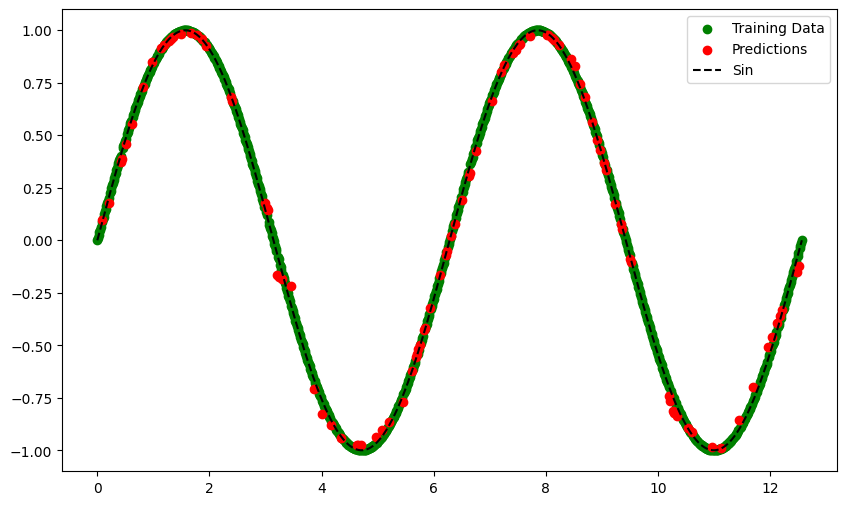

In [22]:
print("Layers = ", len(result.hidden_layer_sizes))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse * 100:.2f}%", f"R2 : {r2 * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(x_train.reshape(-1, 1), y_train, color='green', label='Training Data')
plt.scatter(x_test.reshape(-1, 1), y_pred, label='Predictions', color='red')
plt.plot(x_values, y_values, linestyle='dashed', label='Sin', color='black')
plt.legend()
plt.show()

##Part 4-2 Classification

In [37]:
import pandas as pd
input_path = '/content/drive/MyDrive/Dataset/MNIST/'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MNIST Dataset Loader

In [26]:
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

In [50]:
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


In [91]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(images_train, label_train),(images_test,label_test) = mnist_dataloader.load_data()
images_train = np.array(images_train)
label_train = np.array(label_train)
images_test = np.array(images_test)
label_test = np.array(label_test)

train_images = images_train.astype('float32')/255
test_images = images_test.astype('float32')/255
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_images.shape[1],)),  # First hidden layer
        Dense(64, activation='relu'),  # Second hidden layer
        Dense(32, activation='relu'),  # Third hidden layer
        Dense(10, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

initial_percentage = 5
increments = 15
results = []

for i in range(7):
    data_size = int((initial_percentage + increments * i) / 100 * len(train_images))
    current_train_images = train_images[:data_size]
    current_label_train = label_train[:data_size]

    #Train
    model = create_model()
    print(f"Training model with  ({initial_percentage + increments * i}% of the total training data).")
    history = model.fit(current_train_images, current_label_train, epochs=10, validation_data=(test_images, label_test), verbose=2)

    # Save results
    accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]
    results.append((initial_percentage + increments * i, accuracy, loss))


Training model with  (5% of the total training data).
Epoch 1/10
94/94 - 2s - loss: 0.9970 - accuracy: 0.7177 - val_loss: 0.4999 - val_accuracy: 0.8555 - 2s/epoch - 22ms/step
Epoch 2/10
94/94 - 1s - loss: 0.3599 - accuracy: 0.8967 - val_loss: 0.3926 - val_accuracy: 0.8831 - 871ms/epoch - 9ms/step
Epoch 3/10
94/94 - 1s - loss: 0.2371 - accuracy: 0.9317 - val_loss: 0.3146 - val_accuracy: 0.9081 - 1s/epoch - 11ms/step
Epoch 4/10
94/94 - 2s - loss: 0.1695 - accuracy: 0.9523 - val_loss: 0.3344 - val_accuracy: 0.9012 - 2s/epoch - 20ms/step
Epoch 5/10
94/94 - 1s - loss: 0.1262 - accuracy: 0.9677 - val_loss: 0.2989 - val_accuracy: 0.9145 - 1s/epoch - 13ms/step
Epoch 6/10
94/94 - 1s - loss: 0.0889 - accuracy: 0.9767 - val_loss: 0.2887 - val_accuracy: 0.9175 - 971ms/epoch - 10ms/step
Epoch 7/10
94/94 - 1s - loss: 0.0638 - accuracy: 0.9847 - val_loss: 0.2667 - val_accuracy: 0.9272 - 853ms/epoch - 9ms/step
Epoch 8/10
94/94 - 1s - loss: 0.0513 - accuracy: 0.9890 - val_loss: 0.2824 - val_accuracy: 0

In [93]:
# Print results
for percentage, accuracy, loss in results:
    print(f"Using {percentage}% of data: Test accuracy = {accuracy:.4f}, Test loss = {loss:.4f}")

Using 5% of data: Test accuracy = 0.9282, Test loss = 0.2776
Using 20% of data: Test accuracy = 0.9495, Test loss = 0.2108
Using 35% of data: Test accuracy = 0.9640, Test loss = 0.1470
Using 50% of data: Test accuracy = 0.9720, Test loss = 0.1162
Using 65% of data: Test accuracy = 0.9696, Test loss = 0.1349
Using 80% of data: Test accuracy = 0.9750, Test loss = 0.1000
Using 95% of data: Test accuracy = 0.9774, Test loss = 0.0973


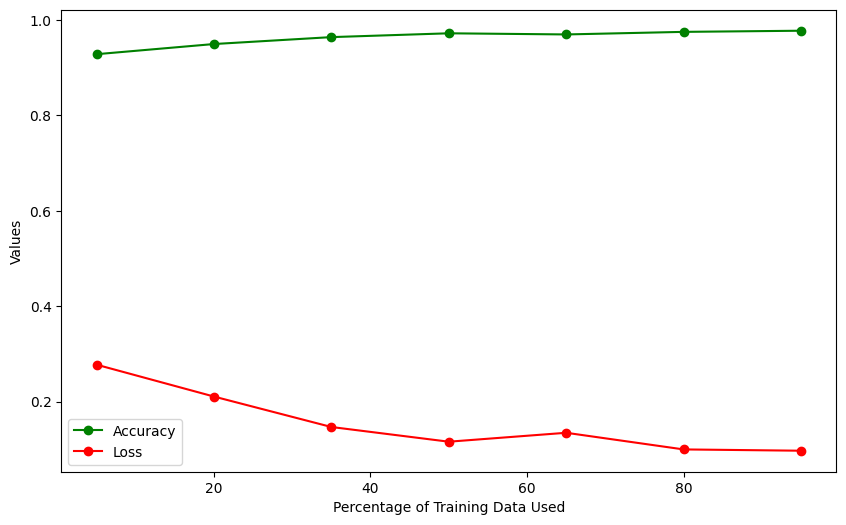

In [94]:
percentages = [item[0] for item in results]
accuracies = [item[1] for item in results]
losses = [item[2] for item in results]

plt.figure(figsize=(10, 6))
plt.plot(percentages, accuracies, label='Accuracy', color='green', marker='o')
plt.plot(percentages, losses, label='Loss', color='red', marker='o')

plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Values')
plt.legend()
plt.show()

##Increase Layers

In [60]:
def create_model(num_layers):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(train_images.shape[1],)))
    for _ in range(num_layers - 1):
        model.add(Dense(64, activation='relu'))  # layers with 64 neurons
    model.add(Dense(10, activation='softmax'))  # Output layer
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

layer_results = []
max_layers = 20

for layers in range(3, max_layers + 1):
    model = create_model(layers)
    print(f"Training model with {layers} layers.")
    history = model.fit(train_images, label_train, epochs=10, validation_data=(test_images, label_test), verbose=2)

    # Save results
    accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]
    layer_results.append((layers, accuracy, loss))

Training model with 3 layers.
Epoch 1/10
1875/1875 - 10s - loss: 0.2405 - accuracy: 0.9271 - val_loss: 0.1105 - val_accuracy: 0.9672 - 10s/epoch - 5ms/step
Epoch 2/10
1875/1875 - 7s - loss: 0.1028 - accuracy: 0.9680 - val_loss: 0.1026 - val_accuracy: 0.9672 - 7s/epoch - 4ms/step
Epoch 3/10
1875/1875 - 9s - loss: 0.0759 - accuracy: 0.9759 - val_loss: 0.0902 - val_accuracy: 0.9733 - 9s/epoch - 5ms/step
Epoch 4/10
1875/1875 - 8s - loss: 0.0581 - accuracy: 0.9812 - val_loss: 0.0916 - val_accuracy: 0.9723 - 8s/epoch - 4ms/step
Epoch 5/10
1875/1875 - 9s - loss: 0.0483 - accuracy: 0.9846 - val_loss: 0.0767 - val_accuracy: 0.9777 - 9s/epoch - 5ms/step
Epoch 6/10
1875/1875 - 9s - loss: 0.0389 - accuracy: 0.9874 - val_loss: 0.1062 - val_accuracy: 0.9707 - 9s/epoch - 5ms/step
Epoch 7/10
1875/1875 - 7s - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.1074 - val_accuracy: 0.9731 - 7s/epoch - 4ms/step
Epoch 8/10
1875/1875 - 9s - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.1022 - val_accuracy: 0.975

In [61]:
# Print results
for layers, accuracy, loss in layer_results:
    print(f"With {layers} layers: Test accuracy = {accuracy:.4f}, Test loss = {loss:.4f}")


With 3 layers: Test accuracy = 0.9776, Test loss = 0.0988
With 4 layers: Test accuracy = 0.9788, Test loss = 0.0922
With 5 layers: Test accuracy = 0.9770, Test loss = 0.0914
With 6 layers: Test accuracy = 0.9791, Test loss = 0.0928
With 7 layers: Test accuracy = 0.9752, Test loss = 0.1098
With 8 layers: Test accuracy = 0.9756, Test loss = 0.1097
With 9 layers: Test accuracy = 0.9741, Test loss = 0.1039
With 10 layers: Test accuracy = 0.9735, Test loss = 0.1106
With 11 layers: Test accuracy = 0.9762, Test loss = 0.1071
With 12 layers: Test accuracy = 0.9734, Test loss = 0.1288
With 13 layers: Test accuracy = 0.9770, Test loss = 0.0967
With 14 layers: Test accuracy = 0.9742, Test loss = 0.1212
With 15 layers: Test accuracy = 0.9706, Test loss = 0.1304
With 16 layers: Test accuracy = 0.9695, Test loss = 0.1363
With 17 layers: Test accuracy = 0.9677, Test loss = 0.1400
With 18 layers: Test accuracy = 0.9619, Test loss = 0.1471
With 19 layers: Test accuracy = 0.9716, Test loss = 0.1259
With

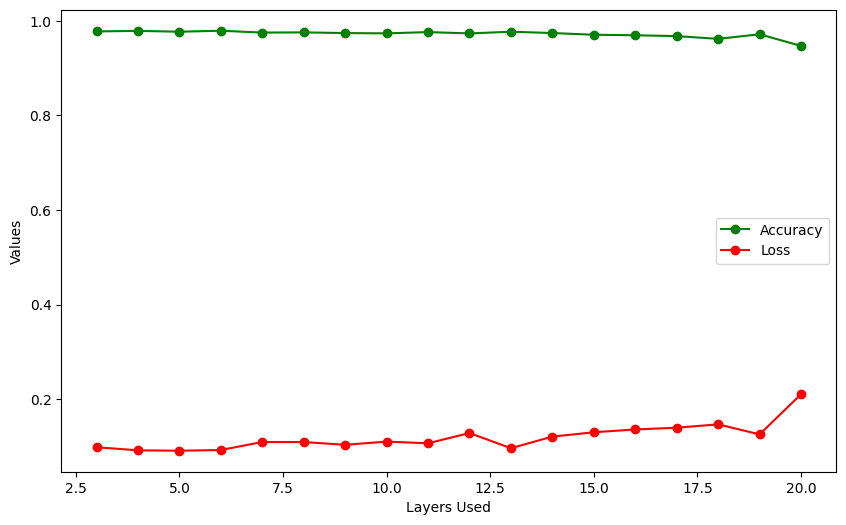

In [97]:
percentages = [item[0] for item in layer_results]
accuracies = [item[1] for item in layer_results]
losses = [item[2] for item in layer_results]

plt.figure(figsize=(10, 6))
plt.plot(percentages, accuracies, label='Accuracy', color='green', marker='o')
plt.plot(percentages, losses, label='Loss', color='red', marker='o')

plt.xlabel('Layers Used')
plt.ylabel('Values')
plt.legend()
plt.show()

In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

def create_optimal_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),

        layers.Conv2D(64, (5, 5), activation='relu'),
        layers.BatchNormalization(),

        layers.Conv2D(128, (7, 7), activation='relu'),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_optimal_cnn_model()
model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


313/313 [==============================] - 55s 175ms/step - loss: 0.0304 - accuracy: 0.9909
Test accuracy: 0.9908999800682068, Test loss: 0.03042251616716385
